In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import librosa

# display wave
import IPython
import IPython.display as ipd

import statistics
from sklearn import linear_model

In [11]:
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)

ravdess_path = os.path.join(parent_dir, "data/raw/ravdess_audios")

ravdess_dir = os.listdir(ravdess_path)

gender_arr = []
path_arr = []
emotion_arr = []

emotions_convert = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

for actor in ravdess_dir:
    actor_files = os.listdir(os.path.join(ravdess_path, actor))
    for audio_file in actor_files:
        file_name = audio_file.split('.')[0]
        #print(audio_file)
        emotion_key = file_name.split('-')[2]
        gender_identifier = int(file_name.split('-')[6])
        
        path_arr.append(f"{ravdess_path}/{actor}/{audio_file}")
        
        if gender_identifier % 2 == 0:
            gender_arr.append("female")
        else:
            gender_arr.append("male")
            
        emotion_arr.append(emotions_convert[emotion_key])
        
df = pd.concat([
    pd.DataFrame(path_arr, columns = ['path']),
    pd.DataFrame(gender_arr, columns = ['gender']),
    pd.DataFrame(emotion_arr, columns = ['emotion'])
], axis = 1)

df

,path,gender,emotion
0,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,neutral
1,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,neutral
2,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,neutral
3,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,neutral
4,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,calm
...,...,...,...
1435,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,surprised
1436,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,surprised
1437,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,surprised
1438,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,surprised


In [12]:
mask = ((df['emotion'] == 'sad') | (df['emotion'] == 'happy') | (df['emotion'] == 'angry') | (df['emotion'] == 'disgust') | (df['emotion'] == 'fearful'))
filtered_df = df[mask]
filtered_df

,path,gender,emotion
12,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,happy
13,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,happy
14,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,happy
15,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,happy
16,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,happy
...,...,...,...
1427,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,disgust
1428,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,disgust
1429,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,disgust
1430,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,disgust


In [13]:
def create_img(PATH, label):
    original_audio, sample_rate = librosa.load(PATH, sr=44100)
    
    mfcc = librosa.feature.mfcc(y=original_audio, sr=sample_rate)
    y, sr = librosa.load(PATH, sr = sample_rate)
    sgram = librosa.stft(y)
    librosa.display.specshow(sgram)
    
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    
    librosa.display.specshow(mel_sgram, sr=sample_rate)
    
#     input_path = f"/emotions/{label}/test.png"
    
    
    
#     plt.savefig(f"{input_path}")
    
#     # Close the plot if you don't want to display it
#     plt.close()
    

In [19]:
df[df['path'].str.contains('Actor_01/03-01-05-01-01-02-01.wav')]['path'].iloc[0]

'C:\\Users\\nrahm\\emotion-from-speech\\data/raw/ravdess_audios/Actor_01/03-01-05-01-01-02-01.wav'

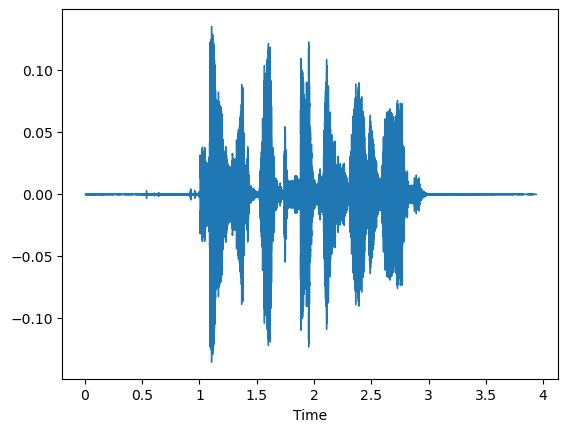

In [73]:
PATH = "C:\\Users\\nrahm\\emotion-from-speech\\data/raw/ravdess_audios/Actor_01/03-01-05-01-01-02-01.wav"
original_audio, sample_rate = librosa.load(PATH, sr=44100)
y, sr = librosa.load(PATH, sr=44100)
fig = librosa.display.waveshow(y, sr=sr)

In [21]:
ipd.Audio(original_audio, rate=44100)

C:\Users\nrahm\AppData\Local\Temp\ipykernel_26100\1218344808.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


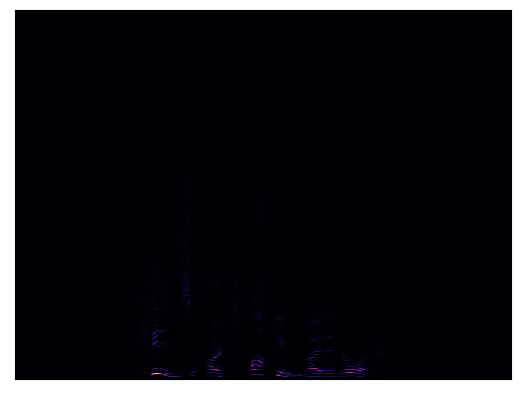

In [22]:
mfcc = librosa.feature.mfcc(y=original_audio, sr=sample_rate)
y, sr = librosa.load(PATH, sr = sample_rate)
sgram = librosa.stft(y)
librosa.display.specshow(sgram)

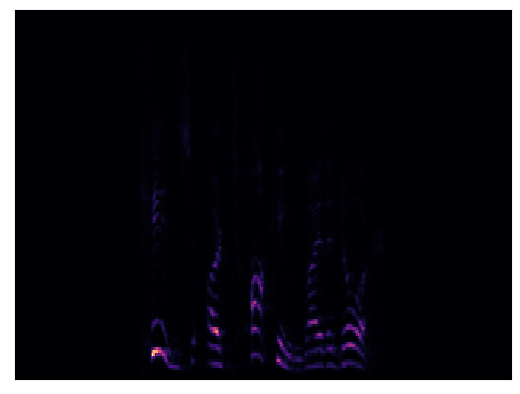

In [23]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

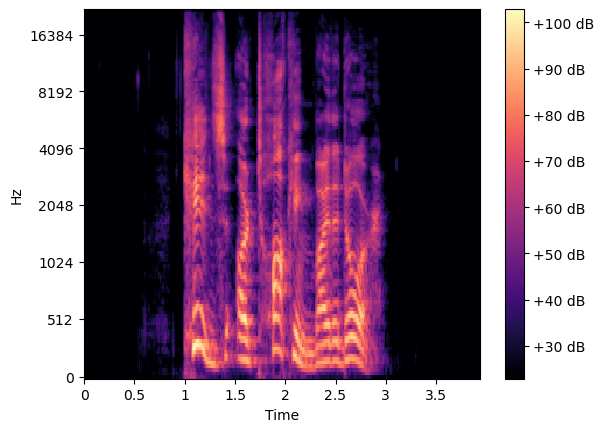

In [24]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [43]:
test1 = pd.DataFrame(mel_sgram).iloc[:, : 390]
test1
#len(mel_sgram)
#test1.shape

,0,1,2,3,4,5,6,7,8,9,...,330,331,332,333,334,335,336,337,338,339
0,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
1,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
2,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
3,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
4,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
124,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
125,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146
126,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,...,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146,22.874146


In [59]:
mel_sgram[mel_sgram > 22.874146]

mel_sgram[0][0]

22.874146

In [50]:
trim = test1.iloc[:, :340]
trim[trim > 22.874146].dropna().to_numpy()

array([], shape=(0, 340), dtype=float32)

In [60]:
def trim_sgram(sgram):
    trim_num = sgram[0][0]
    return sgram[sgram > trim_num]


In [63]:
statistics.mean(trim_sgram(mel_sgram))

50.53555

In [69]:
angry_sad = df[(df['emotion'] == 'sad') | (df['emotion'] == 'angry')]

In [71]:
angry_sad

path
gender
emotion


In [80]:
def lib_load(path):
    y, sr = librosa.load(path, sr=44100)
    sgram = librosa.stft(y)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    trimmed_sgram = trim_sgram(mel_sgram)
    return statistics.mean(trimmed_sgram)

lib_load('C:\\Users\\nrahm\\emotion-from-speech\\data/raw/ravdess_audios/Actor_01/03-01-05-01-01-02-01.wav')



50.53555

In [81]:
#takes awhile to run, already saved to csv below
#angry_sad['sgram_means'] = angry_sad['path'].apply(lib_load)

C:\Users\nrahm\AppData\Local\Temp\ipykernel_26100\3062686345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angry_sad['sgram_means'] = angry_sad['path'].apply(lib_load)


In [86]:
angry_sad = pd.read_csv('angry_sad_means.csv')
angry_sad[]

,Unnamed: 0,path,gender,emotion,sgram_means
0,20,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,sad,35.471916
1,21,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,sad,34.994274
2,22,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,sad,34.307724
3,23,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,sad,44.776450
4,24,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,male,sad,49.883297
...,...,...,...,...,...
379,1411,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,angry,50.981730
380,1412,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,angry,59.086357
381,1413,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,angry,56.198036
382,1414,C:\Users\nrahm\emotion-from-speech\data/raw/ra...,female,angry,53.353790


In [100]:
X = np.array(angry_sad['sgram_means']).reshape(-1, 1)
y = angry_sad['emotion']

In [101]:
mod = linear_model.LogisticRegression().fit(X, y)
preds = mod.predict(X)

In [106]:
sum(preds == y)/len(y)



0.75